# Comparative Analysis Based on Summary Statistics

**1.1 Comparative analysis between summary statistics of the real world observation (USGS) and Simulated streamflow based on most probable Manning's values obtained from the posterior distribution after the Fourth Training Round with 20 realizations(Prior: 0.009x-0.3x Baseline)** 

In [20]:
# ----------------------------------------------------
# Import The Libraries
# ----------------------------------------------------

import pandas as pd

# ----------------------------------------------------
# Load the CSV files
# ----------------------------------------------------
file_path_sim_streamflow = "/home/ms6730/SBI_calibration/summary_statistics_sim_streamflow_gage_1/streamflow_excel_file/streamflow_daily_20_0.009_0.3_M_ens_4.csv"
file_path_observed = "/home/ms6730/SBI_calibration/summary_statistics_sim_streamflow_gage_1/streamflow_excel_file/streamflow_observed_USGS.csv"

# ----------------------------------------------------
# Convert the CSV file to DataFrame
# ----------------------------------------------------
df_sim = pd.read_csv(file_path_sim_streamflow)
df_sim = df_sim[['date', '01608500']]

df_observed = pd.read_csv(file_path_observed)
df_observed = df_observed[['date', '01608500']]


# ------------------------------------------------------------------------------------------
# Exclude the first 5 rows for calculations (they are not including in the training process)
# ------------------------------------------------------------------------------------------
streamflow_data_sim = df_sim['01608500'].iloc[5:]
streamflow_data_observed = df_observed['01608500'].iloc[5:-1]

# -------------------------------------
# Calculate mean and standard deviation 
# -------------------------------------
mean_value_sim_streamflow = streamflow_data_sim.mean()
std_dev_sim_streamflow = streamflow_data_sim.std()

mean_value_observed = streamflow_data_observed.mean()
std_dev_observed = streamflow_data_observed.std()


# ----------------------------------------------------
# Display results
# ----------------------------------------------------
print(f"Mean of the simulated streamflow  at gage 1 (01608500) : {mean_value_sim_streamflow}")
print(f"Standard deviation of simulated streamflow at gage 1 (01608500): {std_dev_sim_streamflow}\n")

print(f"Mean of the observed streamflow from USGS (01608500): {mean_value_observed}")
print(f"Standard deviation of observed streamflow from USGS (01608500): {std_dev_observed}")



Mean of the simulated streamflow  at gage 1 (01608500) : 86.32891056666666
Standard deviation of simulated streamflow at gage 1 (01608500): 125.92325385485275

Mean of the observed streamflow from USGS (01608500): 87.67056999999998
Standard deviation of observed streamflow from USGS (01608500): 108.22564482328877


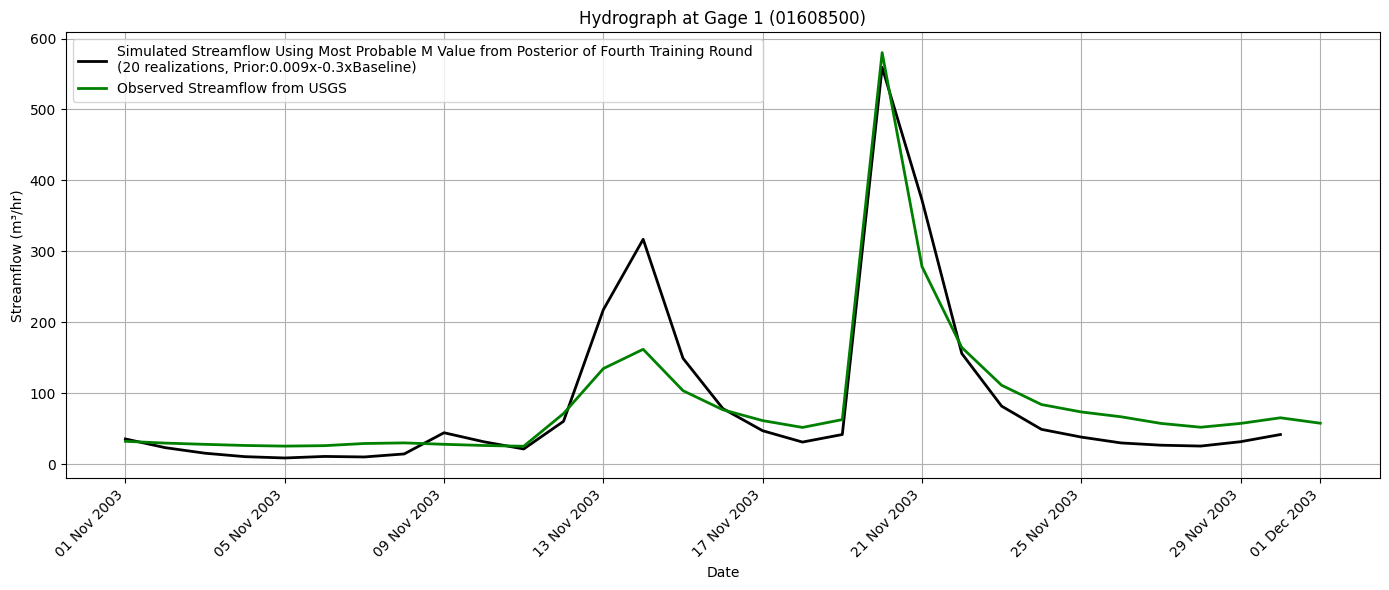

In [23]:
# ----------------------------------------------------
# Import Libraries 
# ----------------------------------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ----------------------------------------------------
# Set Station ID
# ----------------------------------------------------
station_id = '01608500'

# ----------------------------------------------------
# Load Observed and Baseline Data
# ----------------------------------------------------
df_base = pd.read_csv("/home/ms6730/SBI_calibration/summary_statistics_sim_streamflow_gage_1/streamflow_excel_file/streamflow_daily_20_0.009_0.3_M_ens_4.csv")
df_observed = pd.read_csv("/home/ms6730/SBI_calibration/summary_statistics_sim_streamflow_gage_1/streamflow_excel_file/streamflow_observed_USGS.csv")

# ---------------------------
# Convert 'date' to datetime
# ---------------------------
def process_df(df):
    df["date"] = pd.to_datetime(df["date"])
    df.set_index("date", inplace=True)
    return df

df_base = process_df(df_base)
df_observed = process_df(df_observed)

# ----------------------
# Drop the first 5 days 
# ----------------------
dates_base = df_base.index[5:]  
df_base = df_base.iloc[5:]     

# ----------------------------------------------------
# Plot All Data
# ----------------------------------------------------
plt.figure(figsize=(14, 6))

# Plot simulated streamflow 
plt.plot(
    dates_base,
    df_base[station_id],
    color='black', linewidth=2,
    label='Simulated Streamflow Using Most Probable M Value from Posterior of Fourth Training Round \n(20 realizations, Prior:0.009x-0.3xBaseline)',
    zorder=10
)

# Plot observed streamflow 
plt.plot(
    df_observed.index[5:],
    df_observed.iloc[5:][station_id],
    color='green', linewidth=2,
    label='Observed Streamflow from USGS',
    zorder=10
)

# ----------------------------------------------------
# Titles, labels, legend, and grid
# ----------------------------------------------------
plt.title(f"Hydrograph at Gage 1 ({station_id})")
plt.xlabel("Date")
plt.ylabel("Streamflow (m³/hr)")
plt.legend(loc="upper left")
plt.grid(True)

# Format x-axis
locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# ----------------
# Save the Figure 
# ----------------
output_dir = "/home/ms6730/SBI_calibration/summary_statistics_sim_streamflow_gage_1/hydrograph_plots"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "hydrograph_01608500_sim_streamflow_(20_realizations)_vs_observed.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# ------------
# Show Plot
# ------------
plt.show()


**1.2 Comparative analysis between summary statistics of the real world observation (USGS) and Simulated Streamflow based on most probable Manning's values obtained from the posterior distribution after the first training round with 100 realizations (Prior:0.009x-0.3x Baseline)**

In [19]:
# ----------------------------------------------------
# Import The Libraries
# ----------------------------------------------------

import pandas as pd

# ----------------------------------------------------
# Load the CSV files
# ----------------------------------------------------
file_path_sim_streamflow = "/home/ms6730/SBI_calibration/summary_statistics_sim_streamflow_gage_1/streamflow_excel_file/streamflow_sim_100_sim_reject_0.09_0.30.csv"
file_path_observed = "/home/ms6730/SBI_calibration/summary_statistics_sim_streamflow_gage_1/streamflow_excel_file/streamflow_observed_USGS.csv"

# ----------------------------------------------------
# Convert the CSV file to DataFrame
# ----------------------------------------------------
df_sim = pd.read_csv(file_path_sim_streamflow)
df_sim = df_sim[['date', '01608500']]

df_observed = pd.read_csv(file_path_observed)
df_observed = df_observed[['date', '01608500']]


# ------------------------------------------------------------------------------------------
# Exclude the first 5 rows for calculations (they are not including in the training process)
# ------------------------------------------------------------------------------------------
streamflow_data_sim = df_sim['01608500'].iloc[5:]
streamflow_data_observed = df_observed['01608500'].iloc[5:-1]

# -------------------------------------
# Calculate mean and standard deviation 
# -------------------------------------
mean_value_sim_streamflow = streamflow_data_sim.mean()
std_dev_sim_streamflow = streamflow_data_sim.std()

mean_value_observed = streamflow_data_observed.mean()
std_dev_observed = streamflow_data_observed.std()


# ----------------------------------------------------
# Display results
# ----------------------------------------------------
print(f"Mean of the simulated streamflow  at gage 1 (01608500) : {mean_value_sim_streamflow}")
print(f"Standard deviation of simulated streamflow at gage 1 (01608500): {std_dev_sim_streamflow}\n")

print(f"Mean of the observed streamflow from USGS (01608500): {mean_value_observed}")
print(f"Standard deviation of observed streamflow from USGS (01608500): {std_dev_observed}")



Mean of the simulated streamflow  at gage 1 (01608500) : 87.3180942
Standard deviation of simulated streamflow at gage 1 (01608500): 119.18710265497882

Mean of the observed streamflow from USGS (01608500): 87.67056999999998
Standard deviation of observed streamflow from USGS (01608500): 108.22564482328877


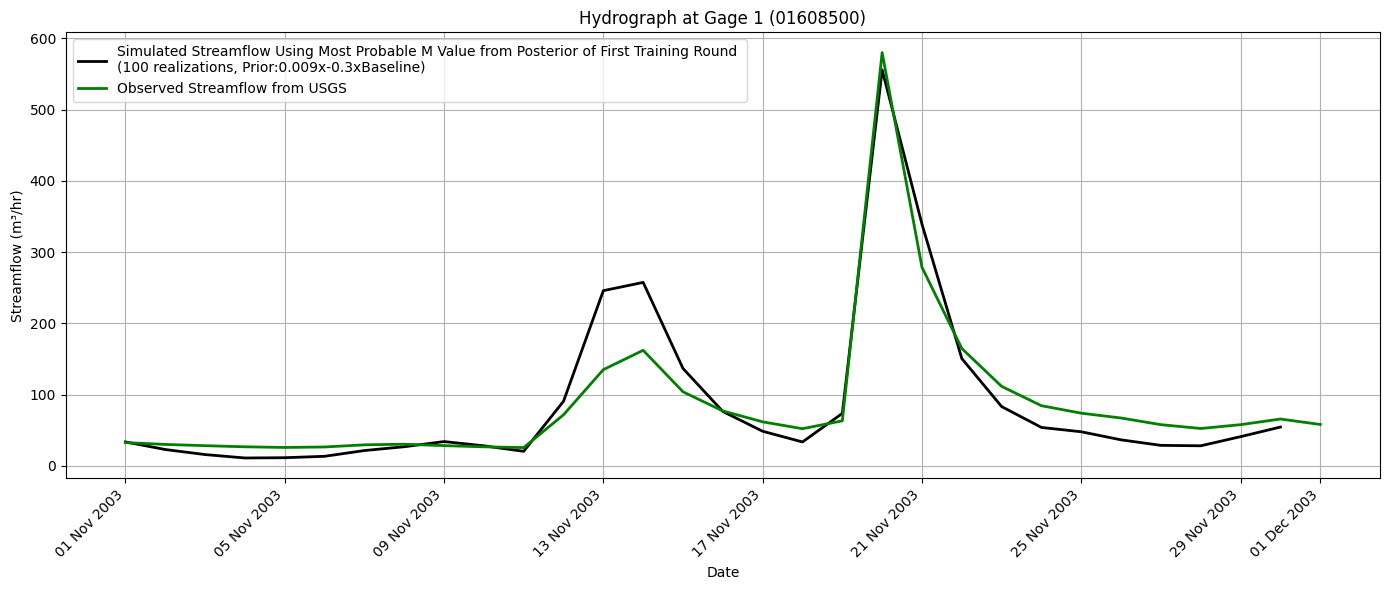

In [30]:
# ----------------------------------------------------
# Import Libraries 
# ----------------------------------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ----------------------------------------------------
# Set Station ID
# ----------------------------------------------------
station_id = '01608500'

# ----------------------------------------------------
# Load Observed and Baseline Data
# ----------------------------------------------------
df_base = pd.read_csv("/home/ms6730/SBI_calibration/summary_statistics_sim_streamflow_gage_1/streamflow_excel_file/streamflow_sim_100_sim_reject_0.09_0.30.csv")
df_observed = pd.read_csv("/home/ms6730/SBI_calibration/summary_statistics_sim_streamflow_gage_1/streamflow_excel_file/streamflow_observed_USGS.csv")

# ----------------------------------------------------
# Convert 'date' to datetime and set it as the index
# ----------------------------------------------------
def process_df(df):
    df["date"] = pd.to_datetime(df["date"])
    df.set_index("date", inplace=True)
    return df

df_base = process_df(df_base)
df_observed = process_df(df_observed)

# ----------------------------------------------------
# Drop the first 5 days from the baseline dataframe
# ----------------------------------------------------
dates_base = df_base.index[5:]  
df_base = df_base.iloc[5:]     

# ----------------------------------------------------
# Plot All Data
# ----------------------------------------------------
plt.figure(figsize=(14, 6))

# Plot simulated streamflow 
plt.plot(
    dates_base,
    df_base[station_id],
    color='black', linewidth=2,
    label='Simulated Streamflow Using Most Probable M Value from Posterior of First Training Round \n(100 realizations, Prior:0.009x-0.3xBaseline)',
    zorder=10
)

# Plot observed streamflow 
plt.plot(
    df_observed.index[5:],
    df_observed.iloc[5:][station_id],
    color='green', linewidth=2,
    label='Observed Streamflow from USGS',
    zorder=10
)

# ----------------------------------------------------
# Titles, labels, legend, and grid
# ----------------------------------------------------
plt.title(f"Hydrograph at Gage 1 ({station_id})")
plt.xlabel("Date")
plt.ylabel("Streamflow (m³/hr)")
plt.legend(loc="upper left")
plt.grid(True)

# Format x-axis
locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# ----------------------------------------------------
# Save the Figure
# ----------------------------------------------------
output_dir = "/home/ms6730/SBI_calibration/summary_statistics_sim_streamflow_gage_1/hydrograph_plots"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "hydrograph_01608500_sim_streamflow_(100_realizations)_vs_observed.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')


# ----------------------------------------------------
# Show Plot
# ----------------------------------------------------
plt.show()


**2.Analysis of Results**

The **objective is to compare** the summary statistics of the simulated streamflow to those of the real-world observations from USGS and determine **which training provides a better match**.  

**The results** show that although both simulations produced streamflow values close to the observations, the simulated streamflow from the **100 realizations training** had a mean and standard deviation closer to the real-world observations, indicating a better match.
